<a href="https://colab.research.google.com/github/apurv100/diabetes-predictor-updated/blob/master/diabetes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score # ROC and AUC 
from sklearn.metrics import accuracy_score # Accuracy 
from sklearn.metrics import recall_score # Recall 
from sklearn.metrics import precision_score # Prescison 
from sklearn.metrics import classification_report # Classification Score Report 


In [ ]:
data = pd.read_csv('data.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
data.shape

(2000, 9)

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

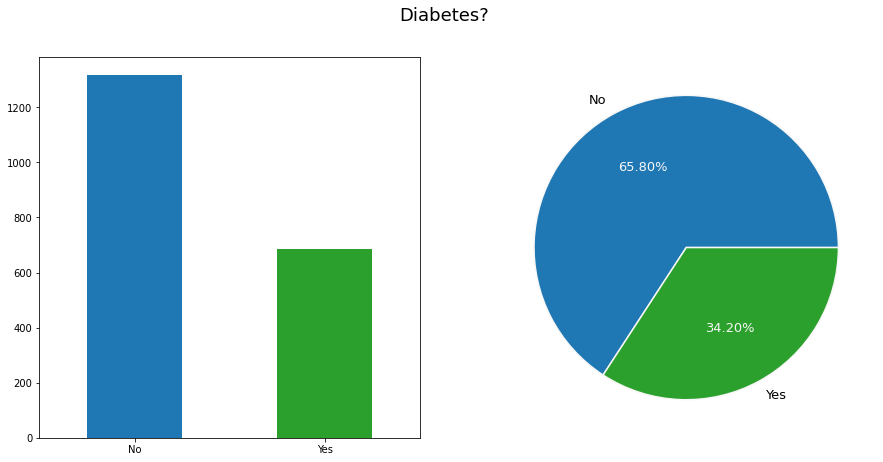

In [ ]:

f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = data.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = data.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

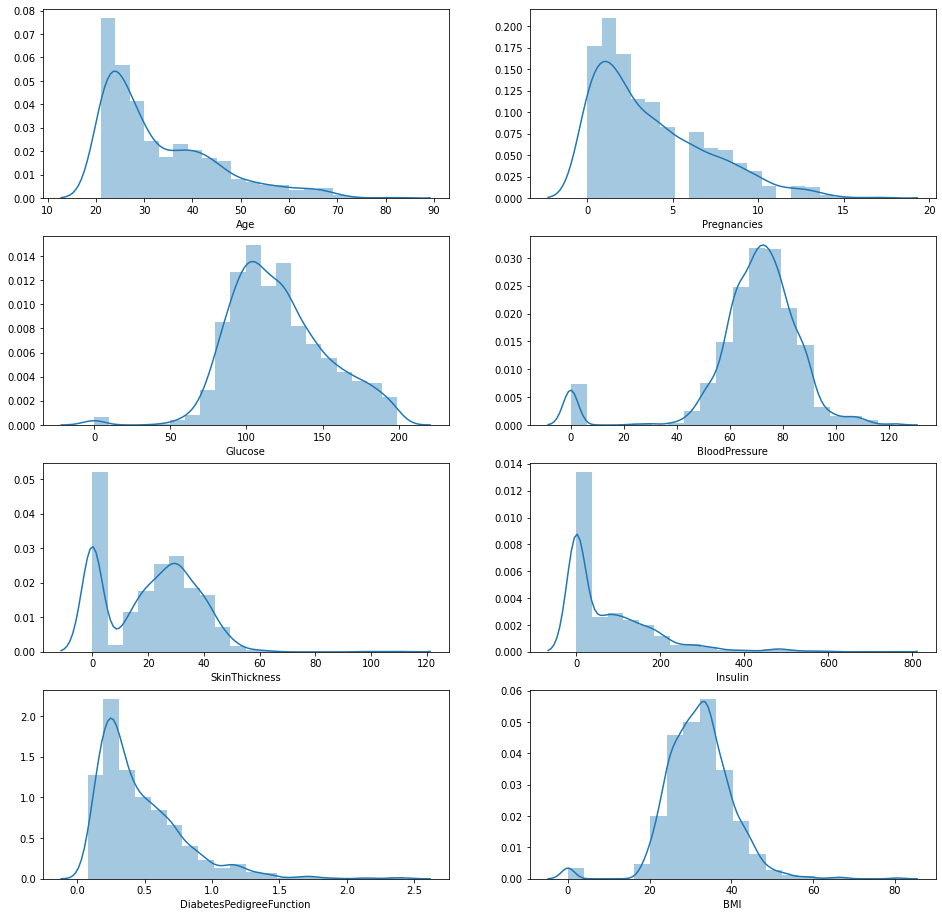

In [ ]:

fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(data.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(data.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(data.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(data.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(data.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(data.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(data.BMI, bins = 20, ax=ax[3,1]) 

In [ ]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
data.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median()
    return temp

In [ ]:
features = ["Insulin","Glucose","SkinThickness",'BloodPressure','BMI']
for feature in features:
    print(median_target(feature))

         Insulin
Outcome         
0          105.0
1          167.0
         Glucose
Outcome         
0          107.0
1          141.0
         SkinThickness
Outcome               
0                 27.0
1                 32.0
         BloodPressure
Outcome               
0                 70.0
1                 75.0
          BMI
Outcome      
0        30.4
1        34.3


In [ ]:
features = ["Insulin","Glucose","SkinThickness",'BloodPressure','BMI']
for feature in features:
    negative = median_target(feature)[feature][0]
    positive = median_target(feature)[feature][1]
    data.loc[(data['Outcome'] == 0 ) & (data[feature].isnull()), feature] = negative
    data.loc[(data['Outcome'] == 1 ) & (data[feature].isnull()), feature] = positive

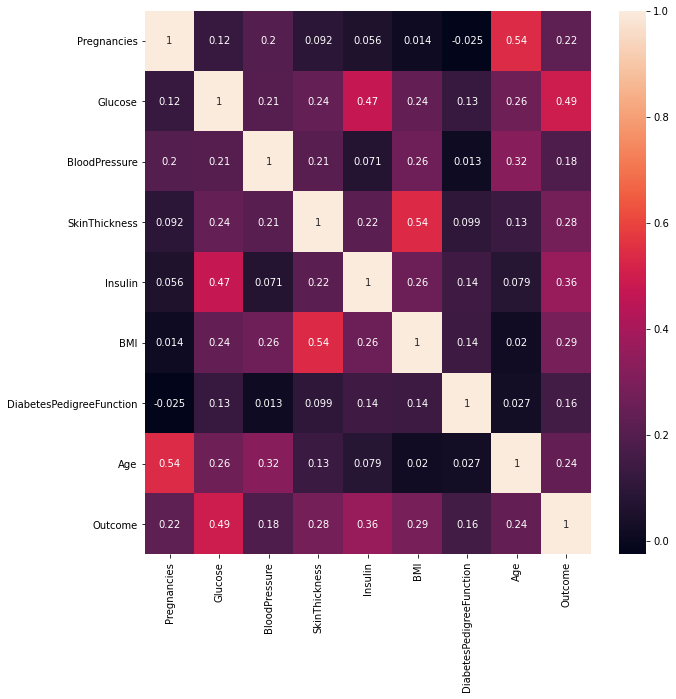

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
X = data.iloc[:,:-1]
Y = data['Outcome']
X.shape


(2000, 8)

In [ ]:
Y.shape

(2000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)


In [ ]:
print("Train set: ",X_train.shape,Y_train.shape)
print("Test set: ",X_test.shape,Y_test.shape)

Train set:  (1600, 8) (1600,)
Test set:  (400, 8) (400,)


In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=100)
#model.fit(X_train,Y_train)


In [ ]:
##from sklearn.metrics import accuracy_score
##print(accuracy_score(Y_test,model.predict(X_test))*100) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [ ]:
Y_pred=CV_rfc.best_estimator_.predict(X_test)

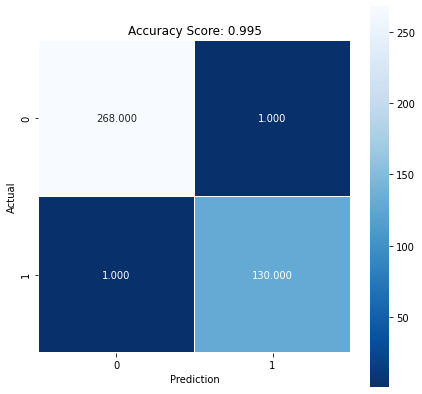

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,Y_pred)

plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.title("Accuracy Score: {}".format(accuracy_score(Y_test, Y_pred)))
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("The recall score for prediction is {:0.2f}".format(recall_score(Y_test, Y_pred)))
print("The prescision score for predion is {:0.2f}".format(precision_score(Y_test, Y_pred)))
print("\n")
print(classification_report(Y_test,Y_pred))

The recall score for prediction is 0.99
The prescision score for predion is 0.99


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       0.99      0.99      0.99       131

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



Text(0.5, 1.0, 'Precision-Recall curve for Logistic Regression Classifier')

<Figure size 504x504 with 0 Axes>

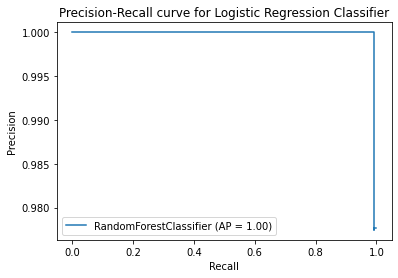

In [ ]:
# Print out the Recall-Precision Plot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

plt.figure(figsize = (7,7))
plot_precision_recall_curve(CV_rfc.best_estimator_, X_test,Y_test)
plt.title("Precision-Recall curve for Logistic Regression Classifier")

In [ ]:
import pickle
pickle.dump(CV_rfc.best_estimator_, open("diabetes.pkl",'wb'))

In [ ]:
ls


data.csv  diabetes.pkl  sample_data/
